<a href="https://colab.research.google.com/github/dantecomedia/GAN/blob/master/generating_data_through_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

In [0]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

z_dim = 100

In [0]:

def generator(img_shape, z_dim):
    
    model = Sequential()
    
    # Hidden layer
    model.add(Dense(128, input_dim=z_dim))

    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(img_shape))

    z = Input(shape=(z_dim,))
    img = model(z)

    return Model(z, img)

In [0]:
def discriminator(img_shape):
    
    model = Sequential()

    model.add(Flatten(input_shape=img_shape))

    # Hidden layer
    model.add(Dense(128))

    # Leaky ReLU
    model.add(LeakyReLU(alpha=0.01))
    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    img = Input(shape=img_shape)
    prediction = model(img)

    return Model(img, prediction)

In [0]:
# Build and compile the Discriminator
discriminator = discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', 
                      optimizer=Adam(), metrics=['accuracy'])

# Build the Generator
generator = generator(img_shape, z_dim)

# Generated image to be used as input
z = Input(shape=(100,))
img = generator(z)

# Keep Discriminator’s parameters constant during Generator training
discriminator.trainable = False

# The Discriminator’s prediction
prediction = discriminator(img)

# Combined GAN model to train the Generator
combined = Model(z, prediction)
combined.compile(loss='binary_crossentropy', optimizer=Adam())

In [0]:
# import modules
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
import os
temp=[]
root_dir = os.path.abspath('.')
data_dir = "/content/gdrive/My Drive/landmark dataset/Train/Alcatraz water tower"
for i in os.listdir(data_dir):
  image_path=data_dir+"/"+i
  img=imread(image_path,flatten=True)
  img=img.astype(float)
  temp.append(img)
  
X_train = np.stack(temp)


  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


In [0]:
losses = []
accuracies = []

import os

def train(iterations, batch_size, sample_interval):

  temp=[]
  root_dir = os.path.abspath('.')
  data_dir = "/content/gdrive/My Drive/landmark dataset/Train28/Alcatraz water tower (1)"
  for i in os.listdir(data_dir):
    image_path=data_dir+"/"+i
    img=imread(image_path,flatten=True)
    img=img.astype('float32')
    #img = np.expand_dims(img, axis=0)
    temp.append(img)
   
  X_train = np.stack(temp)
    
    # Load the dataset
  

  # Rescale -1 to 1
  X_train = X_train / 255.
  X_train = np.expand_dims(X_train, axis=3)

  # Labels for real and fake examples
  real = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for iteration in range(iterations):

      # -------------------------
      #  Train the Discriminator
      # -------------------------

      # Select a random batch of real images
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      # Generate a batch of fake images
      z = np.random.normal(0, 1, (batch_size, 100))
      gen_imgs = generator.predict(z)

      # Discriminator loss
      d_loss_real = discriminator.train_on_batch(imgs, real)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # ---------------------
      #  Train the Generator
      # ---------------------

      # Generate a batch of fake images
      z = np.random.normal(0, 1, (batch_size, 100))
      gen_imgs = generator.predict(z)

      # Generator loss
      g_loss = combined.train_on_batch(z, real)

      if iteration % sample_interval == 0:

          # Output training progress
          print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % 
                       (iteration, d_loss[0], 100*d_loss[1], g_loss))

          # Save losses and accuracies so they can be plotted after training
          losses.append((d_loss[0], g_loss))
          accuracies.append(100*d_loss[1])

          # Output generated image samples 
          sample_images(iteration)

In [0]:
def sample_images(iteration, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, 
              (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise 
    gen_imgs = generator.predict(z)

    # Rescale images to 0-1
    gen_imgs = 0.5 * gen_imgs + 0.5

    
    # Set image grid
    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, 
                                    figsize=(8,8), sharey=True, sharex=True)
    
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output image grid
            axs[i,j].imshow(gen_imgs[cnt, :,:,0])
            axs[i,j].axis('off')
            cnt += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.334786, acc.: 92.58%] [G loss: 2.218056]
1000 [D loss: 0.580996, acc.: 81.64%] [G loss: 1.705956]
2000 [D loss: 0.934514, acc.: 21.48%] [G loss: 1.702941]
3000 [D loss: 0.788067, acc.: 60.55%] [G loss: 1.395079]
4000 [D loss: 0.785550, acc.: 57.03%] [G loss: 1.812529]
5000 [D loss: 1.145000, acc.: 5.08%] [G loss: 1.048217]
6000 [D loss: 0.843489, acc.: 30.86%] [G loss: 1.567829]
7000 [D loss: 0.942477, acc.: 25.78%] [G loss: 1.358926]
8000 [D loss: 0.558677, acc.: 75.78%] [G loss: 1.621579]
9000 [D loss: 0.783224, acc.: 43.36%] [G loss: 1.316961]
10000 [D loss: 0.836958, acc.: 53.52%] [G loss: 1.868993]
11000 [D loss: 0.361170, acc.: 92.58%] [G loss: 2.268085]
12000 [D loss: 0.842348, acc.: 31.64%] [G loss: 1.656151]
13000 [D loss: 0.691508, acc.: 67.58%] [G loss: 1.594241]
14000 [D loss: 0.884307, acc.: 26.95%] [G loss: 1.766368]
15000 [D loss: 1.191063, acc.: 10.55%] [G loss: 1.199908]
16000 [D loss: 0.723889, acc.: 41.02%] [G loss: 1.759550]
17000 [D loss: 1.895817, acc

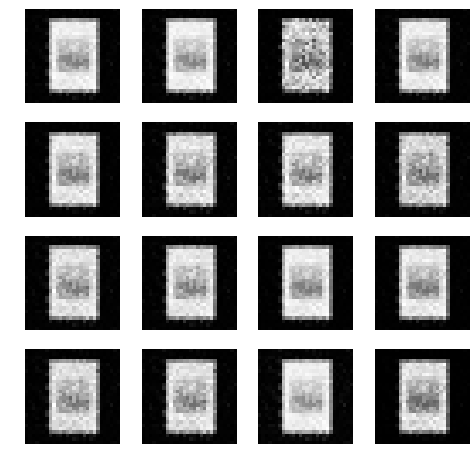

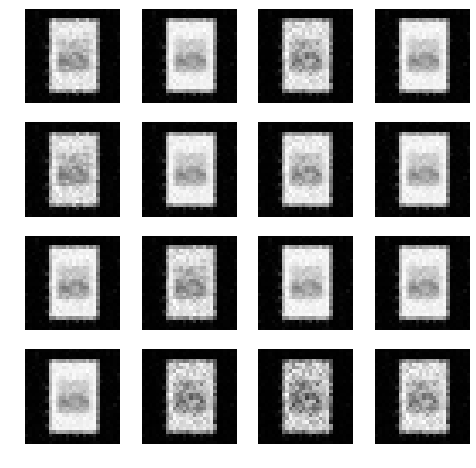

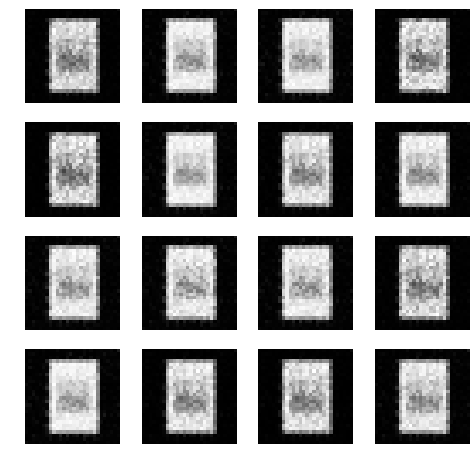

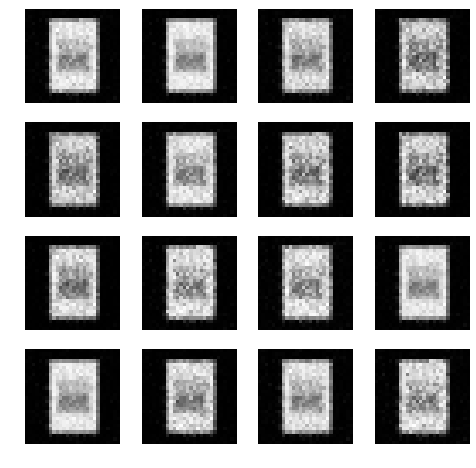

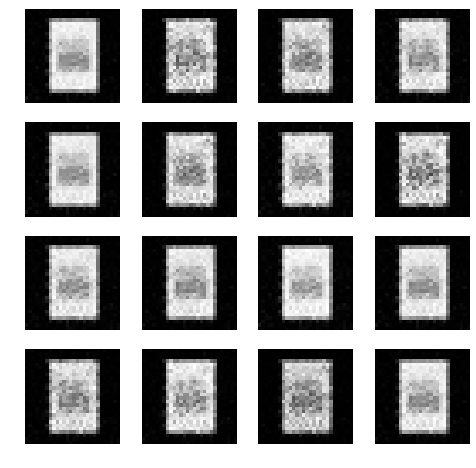

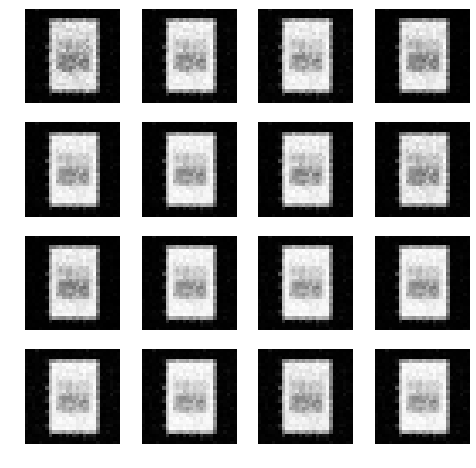

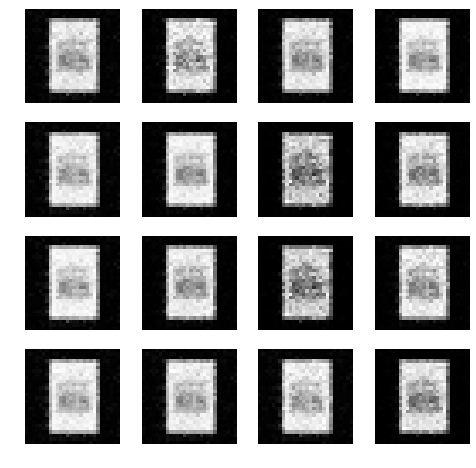

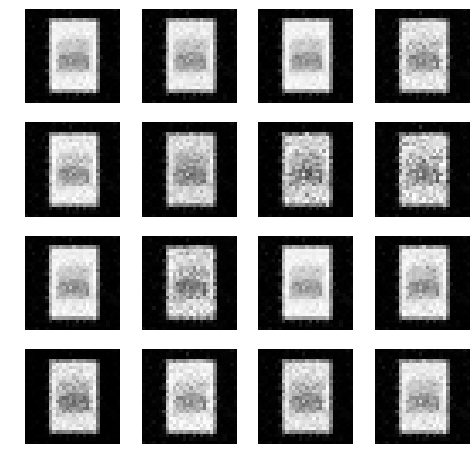

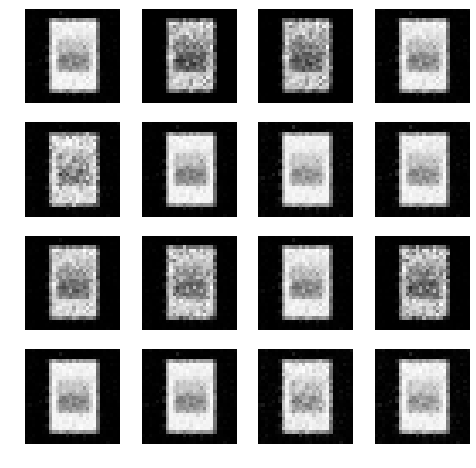

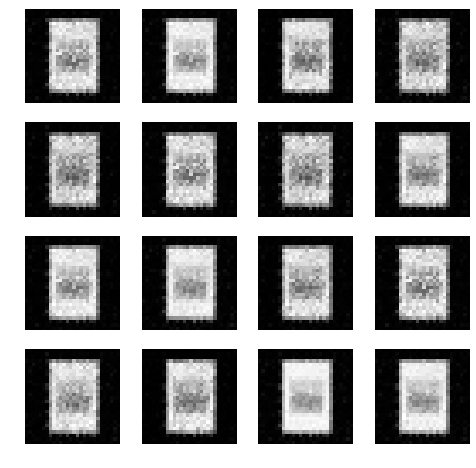

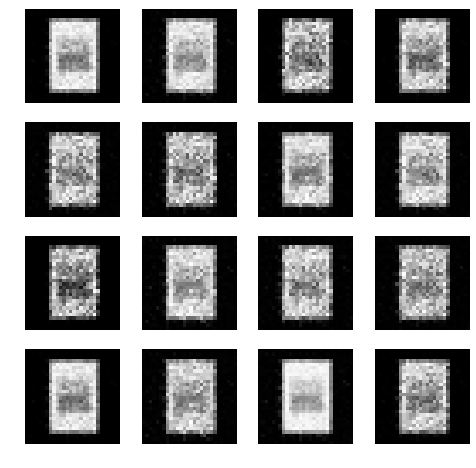

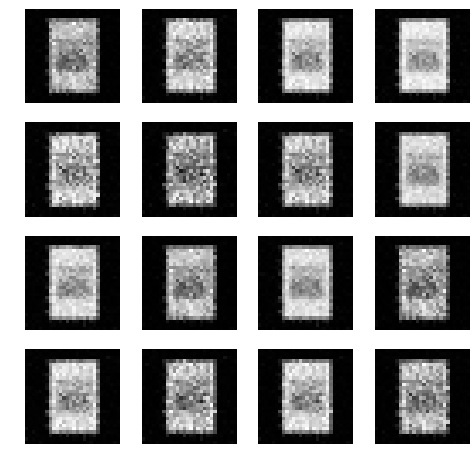

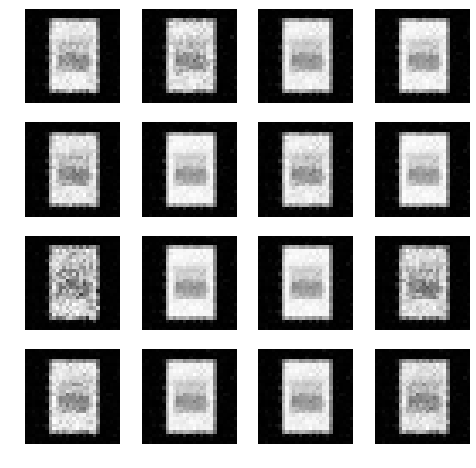

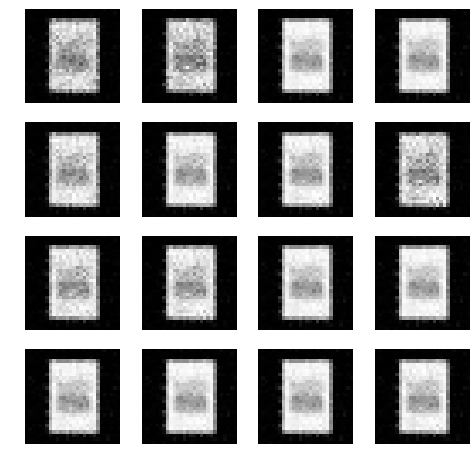

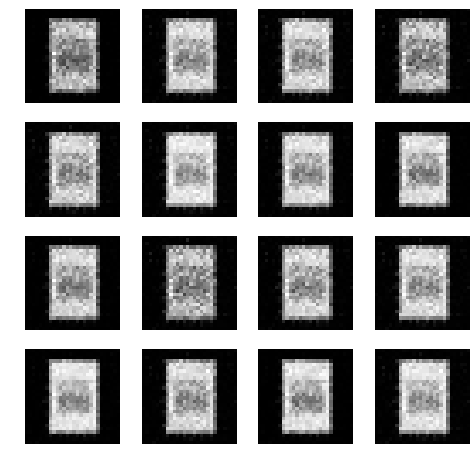

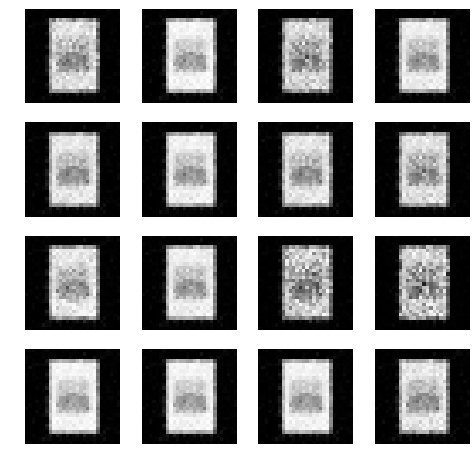

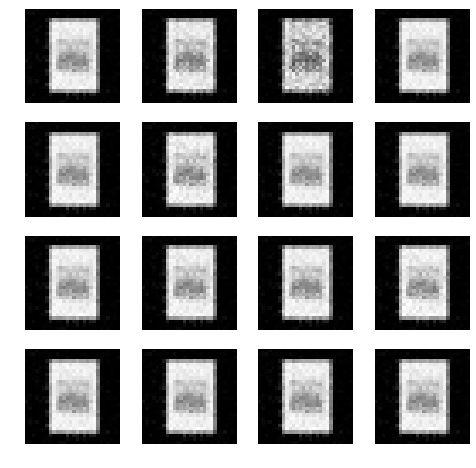

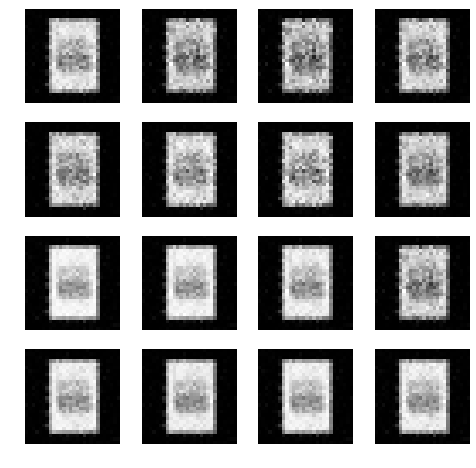

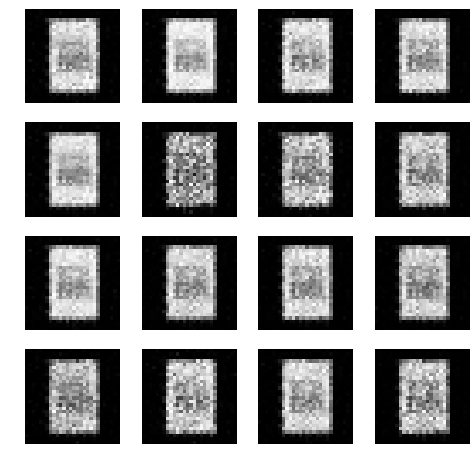

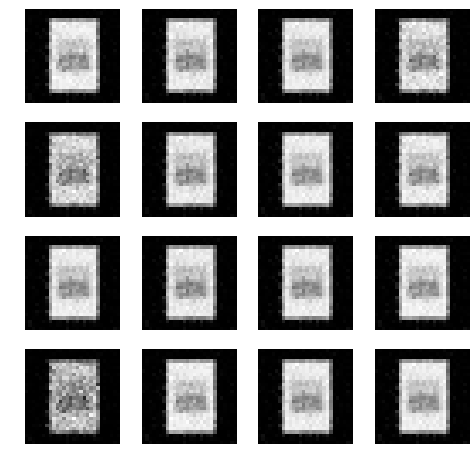

In [0]:
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)